## Linear Regression Fundamentals

We begin our journey with a classic supervised learning technique: **linear regression**.  Here we explore the diabetes dataset and build a model to predict a quantitative measure of disease progression based on ten baseline variables.  We'll cover data exploration, model fitting, evaluation and visualisation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Enable inline plotting
%matplotlib inline

# Load the diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='disease_progression')

print("First five rows of feature data:")
display(X.head())
print()  # Print an empty line for separation
print("Target variable summary:")
print(y.describe())


First five rows of feature data:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



Target variable summary:
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: disease_progression, dtype: float64


In [2]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.3f}")


Mean Squared Error (MSE): 2900.19
R-squared (R²) Score: 0.453


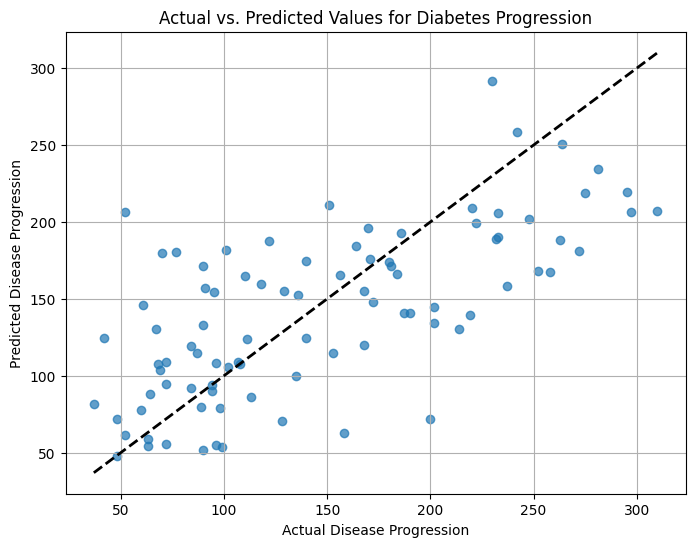

In [3]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title('Actual vs. Predicted Values for Diabetes Progression')
plt.grid(True)
plt.show()


### Interpretation

The scatter plot above compares the **actual** disease progression scores with our model's **predicted** scores.  An ideal model would place all points along the diagonal dashed line.  Our model achieves an $R^2$ of around 0.5, meaning it explains roughly half of the variance in the test data.  While not perfect, this baseline model provides a meaningful starting point.

From a **business perspective**, suppose these predictions represent medical costs for a chronic condition.  Even moderate accuracy can help healthcare providers forecast expenditures and plan resource allocation.  By exploring additional features or adopting more complex models you can further improve predictive power.
